In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df= pd.read_csv('one_hot_encoded(mobiles_data).csv')

In [14]:
df.head()

,Price_in_rupees,Ram,Rom,Expandable,Dual_sim,Screen_in_inch,Secondary_Camera,Battery_details,Warranty
0,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1


In [16]:
x = df[['Ram','Rom','Expandable','Dual_sim','Screen_in_inch','Secondary_Camera','Battery_details','Warranty']]

In [18]:
y = df.Price_in_rupees

In [19]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [26]:
X_train.shape

(487, 8)

In [27]:
X_test.shape

(209, 8)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr_model=LinearRegression()

In [30]:
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
prediction = lr_model.predict(X_test)

In [37]:
compar = pd.DataFrame({"Actual_price_(encoded)":y_test,"predicted_price":prediction})

In [39]:
pred=compar.head(30)

In [34]:
from sklearn import metrics

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction))) 

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [36]:
metrics.explained_variance_score(y_test,prediction)     

1.0

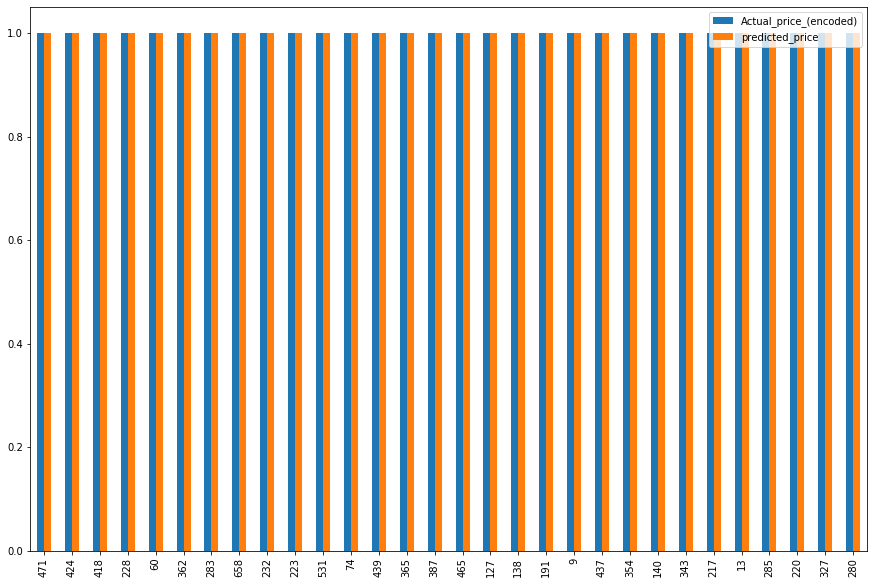

In [42]:
pred.plot(kind='bar',figsize=(15,10))
# plt.grid(linewidth='0.5', color='green')
# plt.grid(linewidth='0.5', color='blue')
plt.show()

In [63]:
accuracy = lr_model.score(X_test,y_test)*100
accuracy =  np.around(accuracy, decimals=2)
print("ACCURACY:",accuracy,"%")

ACCURACY: 100.0 %


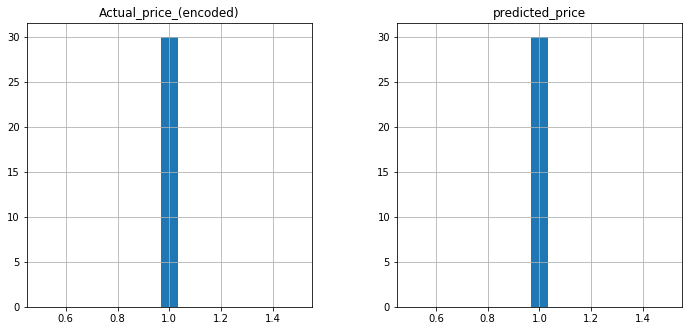

In [64]:
pred.hist(bins=15, figsize=(25, 12), layout=(2, 4));


In [73]:
df_2=pd.DataFrame(pred)

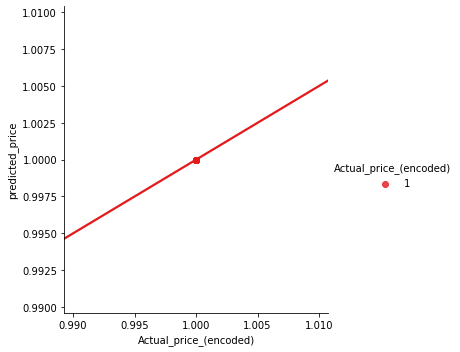

In [77]:
g = sns.lmplot(x="Actual_price_(encoded)", y="predicted_price",data=df_2, hue="Actual_price_(encoded)" ,palette="Set1")